# Note book covers the basic visualizations using Python

* It has basic matplotlib architecture related topics and viz
* Used Seaborn library to implement some of the simple visuals including barchart, regression plot and others
* Also used Folium library to view the data using geographical maps

Libraries, which are required, have been installed/imported as and when required. Also tried to explain as much as possible using comments.

**Import Numpy and Pandas library for basic statistical operations and reading data from excel file**

Will read the data from excel file, process it with some very basic operations and then store it into csv file using pandas methods

In [1]:
# import numpy and pandas library
import pandas as pd
import numpy as np

In [ ]:
# The data set has data related to population immigration to Canada from various parts of the World.
# will read the data from excel file which has actual data rows starting from row-number 20 and 2 footer lines,
# so will skip the first 20 lines and 2 footer lines.

df_can = pd.read_excel('Populations Immigration Dataset.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

In [ ]:
# lets check the shape of the dataframe
df_can.shape

In [ ]:
# before processing will keep the only data csv file
df_can.to_csv('Raw_Population_Immigration_Data.csv')

In [ ]:
# check the head of the dataframe
df_can.head()

In [ ]:
# check the tail of the df
df_can.tail()

In [ ]:
# returns the columns list in the df
df_can.columns

In [ ]:
# will drop some columns from the df, as will not be using them
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1)

# inplace=True is been used to directly make changes into the df
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.columns

In [ ]:
# change the column names to userfriendly names
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [ ]:
# check if any row has missing value
df_can.isnull().sum()

In [ ]:
# lets see the statistical info about the df
df_can.describe()

---

__Save the processed DataFrame into new file__ so that later on we directly fetch the df from that file

In [ ]:
df_can.to_csv('Population_Immigration_PreprocessedData.csv', header=True)

---

## Visualizations using Matplotlib

will try to explore various types of visualizations using matplotlib, seaborn, folium libraries

In [2]:
# Load the data
df = pd.read_csv('Population_Immigration_PreprocessedData.csv',index_col='Unnamed: 0')
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
# check the country column in the df
df.Country

In [3]:
# import matplotlib and matplotlib.pyplot libs 
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# check the version of matplotlib
print('Matplotlib Version : ', mpl.__version__)

Matplotlib Version :  3.1.1


In [ ]:
# various visualization styles are available in Matplotlib, lets get the list of those
print(plt.style.available)

In [5]:
# user can set the required styles using following syntax
mpl.style.use(['seaborn']) # optional

In [ ]:
# lets get the data for all the years for Haiti country
haiti_data = df[df['Country']=='Haiti'].iloc[0,4:]
haiti_data.head()

In [ ]:
# using pyplot we can simply call plot function on the df and mention and the kind of plot we want
plt.figure(figsize=(17,5))
plt.plot(haiti_data)

plt.title('Canada Immigration Graph')
plt.xlabel('Years')
plt.ylabel('Immigration Population')

plt.show()

In [6]:
# Lets have a look at India, China data over the years
# before that will replace the index to contry names so that it is easier to access the particular country data
df_with_Country_Index = df.set_index('Country')
df_with_Country_Index.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [7]:
# lets create a list containing all the years from 1980 till 2013
# option 1
years = ['1980', '1981', '1982', '1983','1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992','1993', '1994',
         '1995', '1996', '1997', '1998', '1999', '2000', '2001','2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
         '2010','2011', '2012', '2013']

#option 2 which is more easier
years = list(map(str, range(1980,2014)))

# print the list
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [8]:
# get the data for India and China from df 
df_IC = df_with_Country_Index.loc[['India','China'],years]
df_IC.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [ ]:
# plot the select data using plot function which will detect the kind of chart automatically
df_IC.plot(figsize=(15,10))
plt.title('Immigration Trend of India and China')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

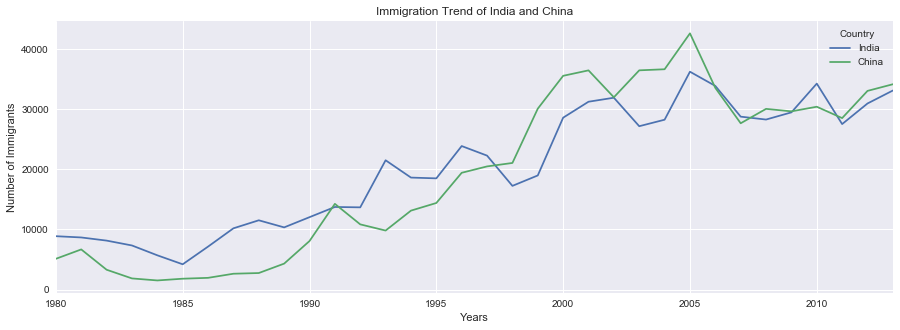

In [9]:
# To make it easier will take the transpose of the df obtained earlier and then plot the data for India and China 
# over the years
df_IC = df_IC.transpose()

df_IC.plot(figsize=(15,5))
plt.title('Immigration Trend of India and China')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

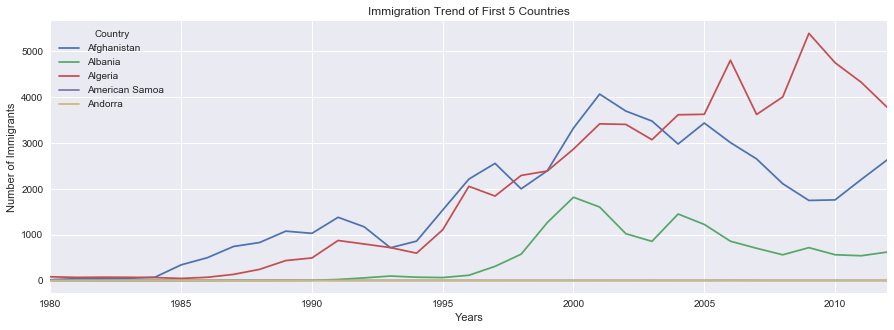

In [10]:
# lets try the same for first 5 countries dataset

df_first5 = df_with_Country_Index.head()

df_first5 = df_first5.iloc[:,3:-1]

df_first5 = df_first5.transpose()

df_first5.plot(figsize=(15,5))
plt.title('Immigration Trend of First 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

In [11]:
# will add one more column to the df for total of the population across all the countries
df_with_Country_Index['Total'] = df_with_Country_Index.sum(axis=1)
df_with_Country_Index.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [12]:
# lets sort the values of df using Total column in descending order
df_with_Country_Index.sort_values('Total',ascending=False, inplace=True)

In [ ]:
df_with_Country_Index.head()

---

### **Area chart using plot function**

* we need to specify the kind arguement as 'area'
* various other parameters are also provided for stacking-up or alphs(decides the display transparency), etc.

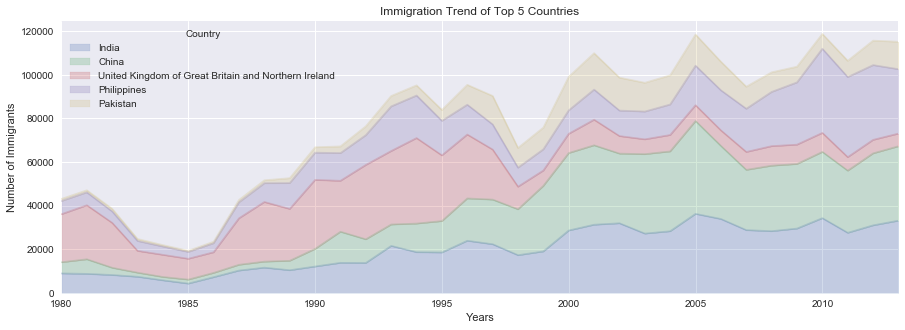

In [13]:
# lets the plot line chart for top 5 countries

df_top5 = df_with_Country_Index.head(5)[years]

df_top5 = df_top5.transpose()

df_top5.plot(kind='area',
             alpha=0.25,
             stacked=True,
             figsize=(15, 5), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

---

### Histogram 

**Will try to change bin size using numpy method**

In [ ]:
# numoy method takes the column dataframe and returns the bin edges & count of values in each bin size as lists
count, bin_edges = np.histogram(df_with_Country_Index['2013'])

print(count)
print(bin_edges)

In [ ]:
# lets plot the histogram of population immigration for all the countries in the year 2013
df_with_Country_Index['2013'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013') 

# add y-label
plt.ylabel('Number of Countries') 

# add x-label
plt.xlabel('Number of Immigrants') 

plt.show()

[37  9  4  6 13  9  5  5  3  3  2  3  1  1  1]
[   0.   134.8  269.6  404.4  539.2  674.   808.8  943.6 1078.4 1213.2
 1348.  1482.8 1617.6 1752.4 1887.2 2022. ]


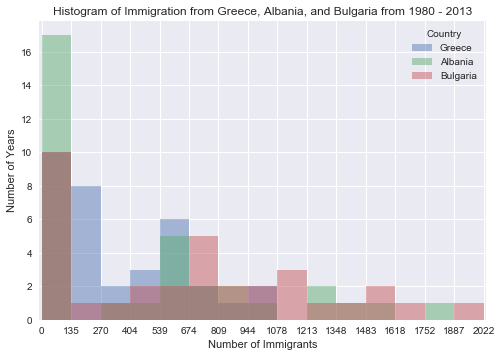

In [14]:
# lets plot the histogram for population immigration from countries including Greece, Albania, Bulgaria

df_GAB = df_with_Country_Index.loc[['Greece','Albania','Bulgaria'],years]

# Take the transpose of the df, can try plotting the histogram with transposing the df
# however practically we prefer the keep dependet variables on Y-axis and indepedent variables on X-axis
df_GAB = df_GAB.transpose()

# get the bin sizes
count,bin_edges = np.histogram(df_GAB, 15)
print(count)
print(bin_edges)

# will scale the X-axis for given bin range
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10

# plot the histogram using bins and X-axis range
df_GAB.plot(kind = 'hist',
           alpha = 0.45,
           bins = 15,
           xticks = bin_edges,
           xlim = (xmin, xmax)
           )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

---

### Bar Chart 

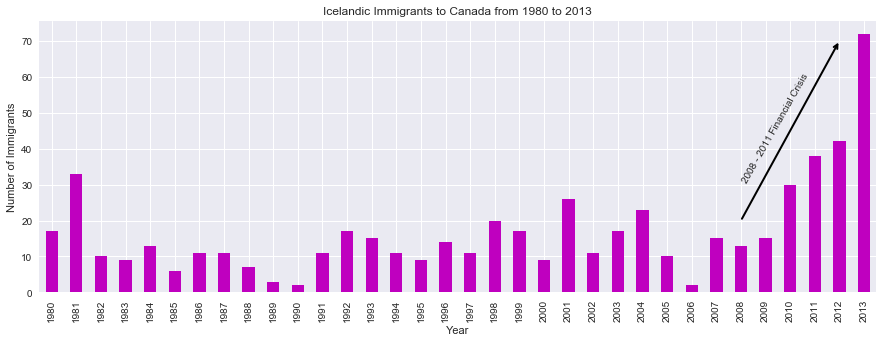

In [15]:
# Get the dataset of Iceland for the given years

df_iceland = df_with_Country_Index.loc['Iceland',years]

df_iceland.plot(kind='bar', figsize=(15, 5),color='m') # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='k', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=60.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' aligned.
            )

plt.show()

---

### Pie chart

In [16]:
# will get the sum population across the continents
df_continents = df_with_Country_Index.groupby('Continent',axis=0).sum()

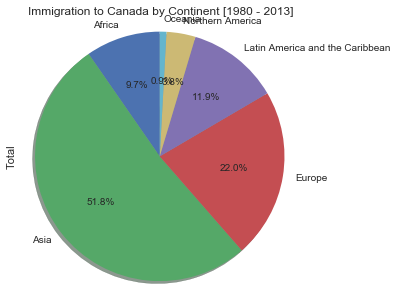

In [17]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 5),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

__Lets improve the pie chart using some arguements__

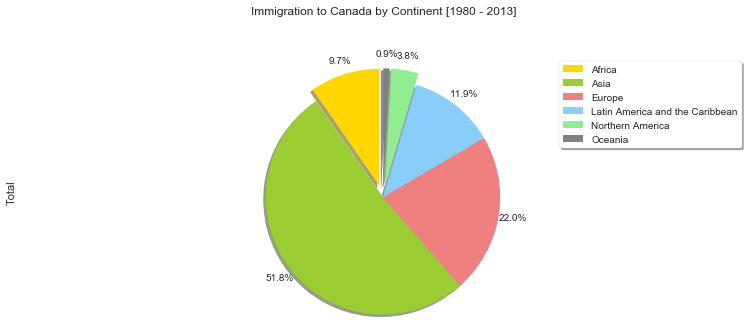

In [18]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'grey']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(13, 5),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # ratio between center of each pie slice & start of text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.13) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper right',frameon=True,fancybox=True,shadow=True,facecolor='white') 

plt.show()

---

### Box Plot

In [19]:
# Lets get the top 15 countries data
df_top15 = df_with_Country_Index.head(15)[years]

df_top15.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


In [20]:
# Create a new dataframe which contains the aggregate for each decade. One way to do that:

# Create a list of all years in decades 80's, 90's, and 00's.
# Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
# Merge the three series into a new data frame. Call your dataframe new_df.

year80s = list(map(str, range(1980,1990)))
year90s = list(map(str, range(1990,2000)))
year00s = list(map(str, range(2000,2010)))

df80s = df_top15.loc[:,year80s].sum(axis=1)
df90s = df_top15.loc[:,year90s].sum(axis=1)
df00s = df_top15.loc[:,year00s].sum(axis=1)

new_df = pd.DataFrame({'1980s':df80s, '1990s':df90s, '2000s':df00s})

new_df

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


In [ ]:
new_df.describe()

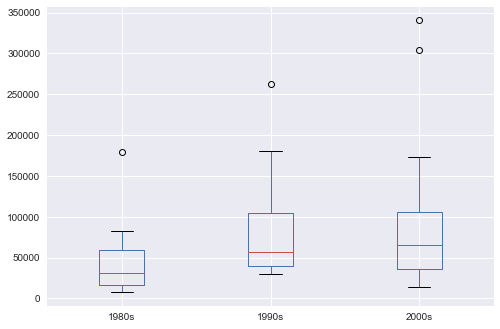

In [21]:
new_df.plot(kind='box')

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:

* larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
* smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade __2000s__ as an example:
    * Q1 (25%) = 36,101.5
    * Q3 (75%) = 105,505.5
    * IQR = Q3 - Q1 = 69,404

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404) <br>
Outlier > 209,611.5

In [ ]:
# lets get the outlier in the years 2000s
new_df[new_df['2000s']> 209611.5]

---

### Scatter Plot

In [22]:
# Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.
# Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. 
# Name this new dataframe df_total.
# Reset the index in place.
# Rename the columns to year and total.
# Display the resulting dataframe.

df_countries = df_with_Country_Index.loc[['Denmark','Norway','Sweden'],years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace=True)

df_total.rename(columns={'index':'year',0:'total'},inplace=True)

df_total['year'] = df_total['year'].astype(int)

df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


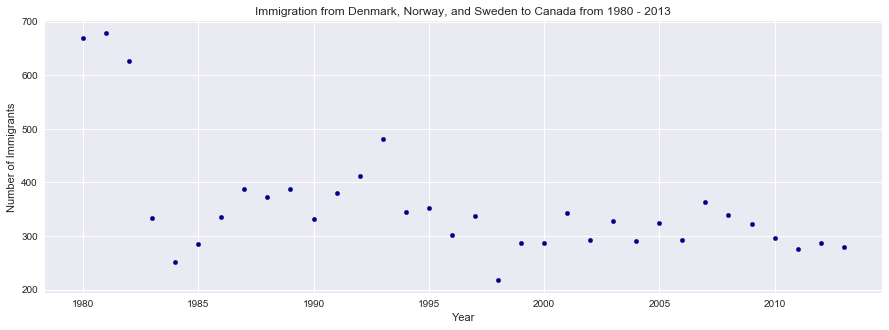

In [23]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(15, 5), color='darkblue')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# show plot
plt.show()

---

__Scatter Plot using normalized/scaled dataset__

In [25]:
# Get the data for Brazil and Argentina. Like in the previous example, we will convert the Years to type int and 
# bring it in the dataframe.

df_years = df_with_Country_Index[years].transpose()

df_years.index = map(int, df_years.index)

df_years.index.name = 'Year'

df_years.reset_index(inplace=True)

df_years.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


__Various types of normalization techniques can be used as:__

* Average scaling : $x$/$x_{min}$
* Linear scaling : ($x$ - $x_{min}$) / ($x_{max}$ - $x_{min}$)
* Z-score scaling : ($x$ - $\mu$)/$\delta$
* Logarithmic scaling : x' = log(x)

In [ ]:
# Create normalized weights, will be using linear scaling in our case
normal_brazil = (df_years['Brazil'] - df_years['Brazil'].min()) / (df_years['Brazil'].max() - df_years['Brazil'].min())

normal_argentina = (df_years['Argentina'] - df_years['Argentina'].min()) / (df_years['Argentina'].max() - df_years['Argentina'].min())

### Bubble plot (Extension of Scatter plot) for 3 dimenssional info

In [ ]:
# Brazil
ax0 = df_years.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=normal_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_years.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=normal_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [26]:
normal_India = (df_years['India'] - df_years['India'].min()) / (df_years['India'].max() - df_years['India'].min())

normal_China = (df_years['China'] - df_years['China'].min()) / (df_years['China'].max() - df_years['China'].min())

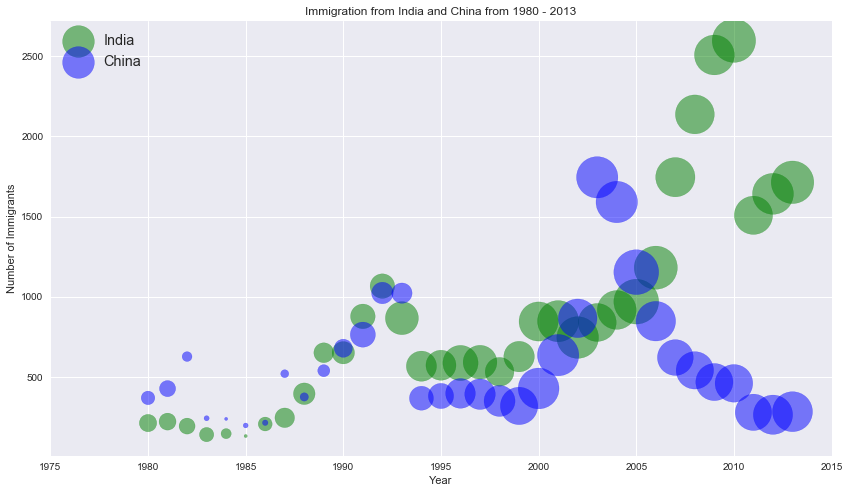

In [27]:
# India
ax0 = df_years.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=normal_India * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# China
ax1 = df_years.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=normal_China * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from India and China from 1980 - 2013')
ax0.legend(['India', 'China'], loc='upper left', fontsize='x-large')

---

### Waffle chart

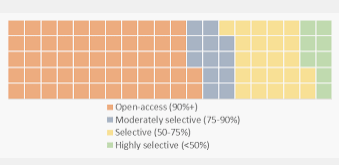

In [28]:
# Get the data of Denmark, Norway, Sweden

df_dsn = df_with_Country_Index.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [ ]:
# The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

In [ ]:
# The second step is defining the overall size of the waffle chart

width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

In [ ]:
# The third step is using the proportion of each category to determe it respective number of tiles

# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

In [ ]:
# The fourth step is creating a matrix that resembles the waffle chart and populating it.

# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

In [ ]:
waffle_chart

In [ ]:
# Map the waffle chart matrix into a visual

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

In [ ]:
# Modification to chart

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

In [32]:
import matplotlib.patches as mpatches

In [ ]:
# Legend for a chart

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [33]:
# Integrated function to create a waffle chart

import matplotlib.patches as mpatches

def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [34]:
width = 50
height = 10
categories = df_dsn.index.values
values = df_dsn['Total']
colormap = plt.cm.viridis

Total number of tiles is 500
Denmark: 161
Norway: 96
Sweden: 243


<Figure size 576x396 with 0 Axes>

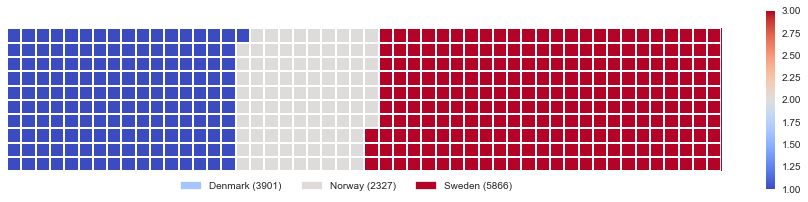

In [35]:
create_waffle_chart(categories, values, height, width, colormap)

---

### WordCloud

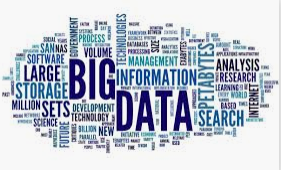

__Install wordcloud__ <br>
`conda install -c https://conda.anaconda.org/conda-forge wordcloud`

**If you are getting Environment error while installing WordCloud then go to the anaconda prompt and then run the command :**<br>
`python -m pip install wordcloud`


In [ ]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# open the file and read it into a variable alice_novel
alice_novel = open('novel.txt', 'r').read()

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

In [ ]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(5) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(5) # set width
fig.set_figheight(10) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from PIL import Image

In [ ]:
alice_mask = np.array(Image.open('mask.png'))

In [ ]:
fig = plt.figure()
fig.set_figwidth(7) # set width
fig.set_figheight(15) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(7) # set width
fig.set_figheight(15) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
total_immigration = df_with_Country_Index['Total'].sum()
total_immigration

In [ ]:
max_words = 90
word_string = ''
for country in df_with_Country_Index.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_with_Country_Index.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

In [ ]:
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

In [ ]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(10)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---

# Using Seaborn Lib

In [36]:
import seaborn as sns

In [37]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_with_Country_Index[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


In [ ]:
# simple regression plot using Seaborn
plt.figure(figsize=(15,5))
ax = sns.regplot(x='year', y='total', data=df_tot)

In [ ]:
# adding color arguement to change the color of the plot
plt.figure(figsize=(15,5))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

In [ ]:
# changing the marker
plt.figure(figsize=(15,5))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

sns.set(font_scale=1.2)
sns.set_style('whitegrid')

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

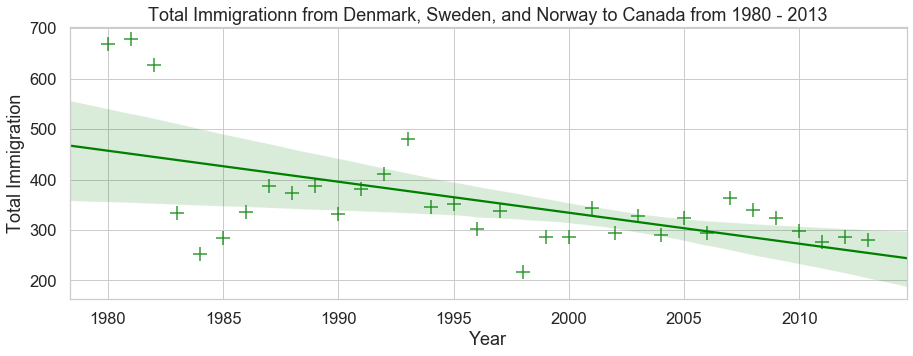

In [38]:
df_countries = df_with_Country_Index.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace=True)

df_total.columns = ['year', 'total']

df_total['year'] = df_total['year'].astype(int)

plt.figure(figsize=(15, 5))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

---

# Maps using Folium in Python

* Install folium if not available
    `conda install -c conda-forge folium`
* Or you can go to the anaconda prompt and run the command 
     `python -m pip install folium`
* If you are not able to see the output in jupyter run via Microsoft Edge,prefer using Chrome. 

In [ ]:
# import the folium package
import folium

from IPython.display import display

In [ ]:
# lets print the simple world map using folium
world_map = folium.Map()
world_map

# using specific location
india_map = folium.Map(location=[20.59,78.96], zoom_start=5)

# using tiles
india_map = folium.Map(location=[20.59,78.96], zoom_start=5, tiles='Stamen Toner')
india_map = folium.Map(location=[20.59,78.96], width='75%', height='75%', zoom_start=5, tiles='Stamen Terrain')
display(india_map)

* For a list of available tilesets see [MapTiles](https://leaflet-extras.github.io/leaflet-providers/preview/)
* [Maptiler](https://www.maptiler.com/) (free) that offers a much larger range of tile sets and gives fairly detailed guidance on using your chosen tile set in your code.

In [ ]:
# lets read the crime-records dataset

df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
df.head()

In [ ]:
df.shape

In [ ]:
# lets get the first 100 records only 
limit = 100
df_100 = df.iloc[0:limit,:]
df_100.head()

In [ ]:
df_100.shape

In [ ]:
# lets take the San Francisco lat long
sf_lat = 37.77
sf_long = -122.42

In [ ]:
sf_map = folium.Map(location=[sf_lat,sf_long], width='75%', height='75%', zoom_start=13)

In [ ]:
# lets add the locations of crime onto the map
crime_loc = folium.map.FeatureGroup()

for lt,lg in zip(df_100.Y, df_100.X):
    crime_loc.add_child(
        folium.CircleMarker(
            [lt, lg],
            radius = 5,    # circle marker radius
            color = 'yellow',
            fill = True,
            fill_color = 'green',
            fill_opacity = 0.6
        )
    )
    
# pop up text for marker on the map
lats = list(df_100.Y)
longs = list(df_100.X)
labels = list('Incident type: '+df_100.Category+' \nAddress: '+df_100.Address+' \nAction: '+df_100.Resolution)
    
for lt,lg,lb in zip(lats,longs,labels):
    folium.Marker([lt,lg], popup=lb).add_to(sf_map)
    
# add crime_loc to map
sf_map.add_child(crime_loc)

In [ ]:
sf_map = folium.Map(location=[sf_lat,sf_long], width='75%', height='75%', zoom_start=13)

for lt,lg,lb in zip(df_100.Y, df_100.X, df_100.Address):
    folium.CircleMarker(
        [lt, lg],
        radius = 5,    # circle marker radius
        color = 'yellow',
        fill = True,
        popup = lb,
        fill_color = 'green',
        fill_opacity = 0.6
    ).add_to(sf_map)
    

sf_map

In [ ]:
from folium import plugins

In [ ]:
# instantiate marker cluster

# let's start again with a clean copy of the map of San Francisco
sf_map = folium.Map(location = [sf_lat, sf_long], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
crimes = plugins.MarkerCluster().add_to(sf_map)

# loop through the dataframe and add each data point to the mark cluster
for lt, lg, lb, in zip(df_100.Y, df_100.X, df_100.Address):
    folium.Marker(
        location=[lt, lg],
        icon=None,
        popup=lb,
    ).add_to(crimes)

# display map
sf_map

---

# Choropleth Map

In [ ]:
world_geo = r'world_countries.json'

world_map = folium.Map(location=[0,0], zoom_start=2)

In [ ]:
df = df_with_Country_Index.reset_index()

In [ ]:
# generate choropleth map using the total immigration of each country

world_map.choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

world_map